In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
dataset = pd.read_csv("/Users/mdshalique/Downloads/practicePythonOP/Algerian_Forest_Fire_Prediction/Dataset/Algerian_forest_fires_dataset_UPDATE.csv")
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [385]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning


### Missing values

In [386]:
dataset.isnull()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,False,False,False,False,False,False,False,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [387]:
dataset.isnull().any()

day            False
month           True
year            True
Temperature     True
 RH             True
 Ws             True
Rain            True
FFMC            True
DMC             True
DC              True
ISI             True
BUI             True
FWI             True
Classes         True
dtype: bool

In [388]:
dataset.isnull().any(axis = 'columns')

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [389]:
dataset[dataset.isnull().any(axis = 'columns')]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [390]:
dataset.loc[0:122,"Region"] = 0
dataset.loc[122:,"Region"] = 1
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [391]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [392]:
dataset["Region"] = dataset["Region"].astype(int)

In [393]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [394]:
dataset = dataset.dropna().reset_index(drop=True)

In [395]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [396]:
dataset = dataset.drop(122).reset_index(drop=True)

In [397]:
dataset.columns = dataset.columns.str.strip()

In [398]:
dataset[["day", "month", "year", "Temperature", "RH", "Ws"]] = dataset[["day", "month", "year", "Temperature", "RH", "Ws"]].astype(int)

In [399]:
objects = [feature for feature in dataset.columns if dataset[feature].dtypes =='O']
for i in objects:
    if i!= "Classes":
        dataset[i] = dataset[i].astype(float)

In [400]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [401]:
dataset.to_csv("/Users/mdshalique/Downloads/practicePythonOP/Algerian_Forest_Fire_Prediction/Dataset/Algerian_cleaned_dataset.csv")

In [402]:
df = dataset.drop(["day","month","year"],axis = 1)

In [403]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [404]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [405]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),"not fire","fire")

## Plotting

/var/folders/6v/mq6xsp953417r5mgvbltf_jh0000gn/T/ipykernel_75447/3494698043.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


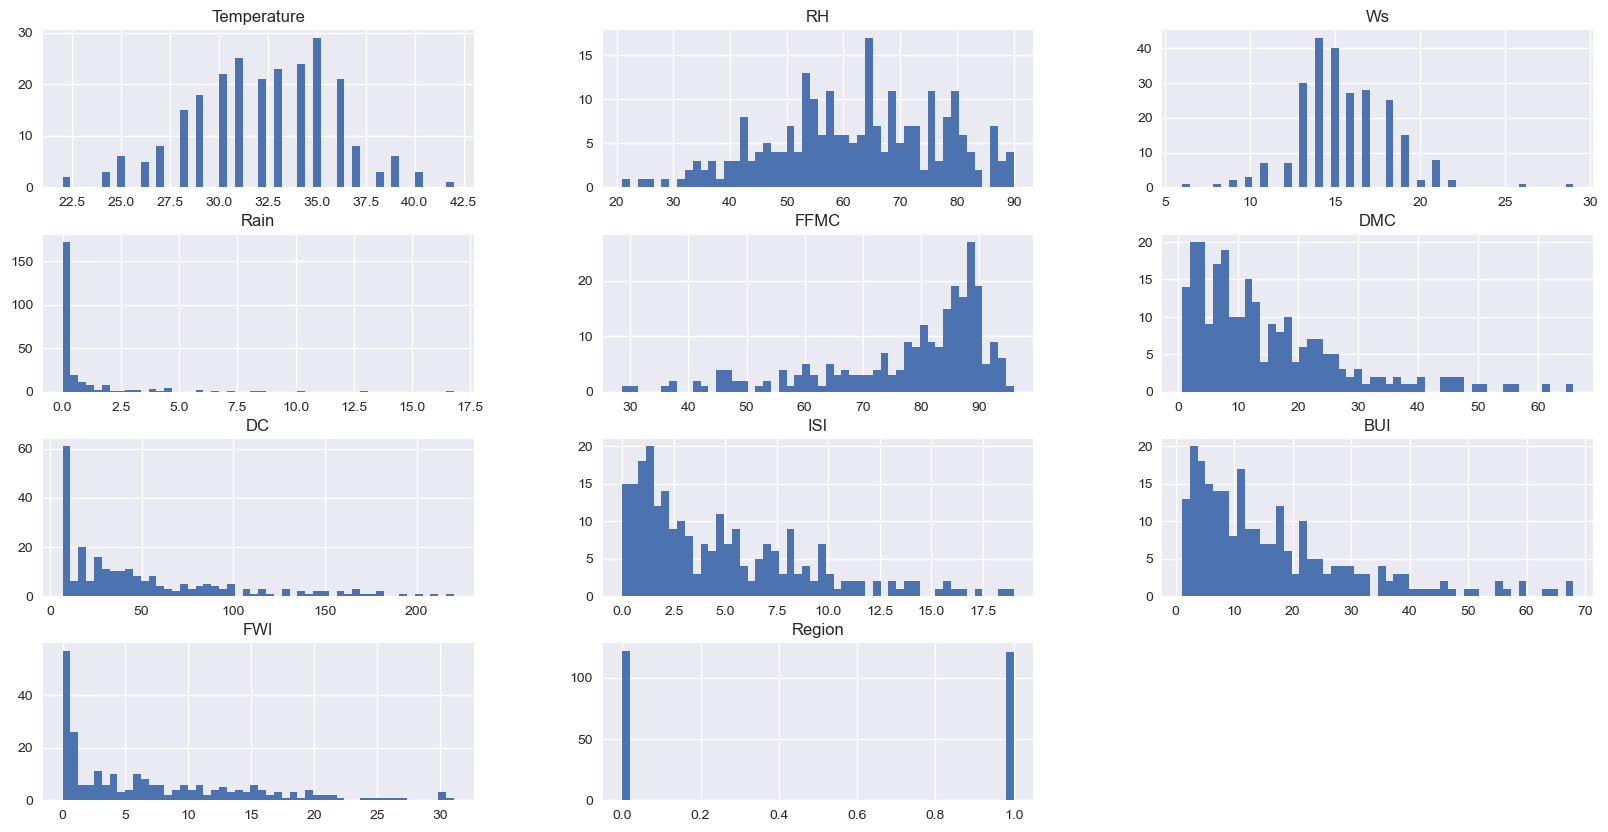

In [406]:
plt.style.use("seaborn")
df.hist(bins = 50,figsize = (20,10))
plt.show()

## Plotting a Pie Chart

/var/folders/6v/mq6xsp953417r5mgvbltf_jh0000gn/T/ipykernel_75447/1554295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/6v/mq6xsp953417r5mgvbltf_jh0000gn/T/ipykernel_75447/1554295.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

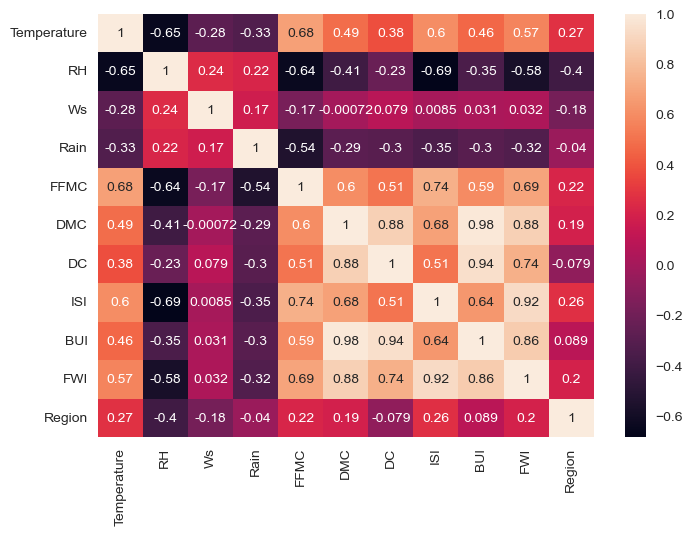

In [407]:
df.corr()
sns.heatmap(df.corr(),annot=True)


<Axes: >

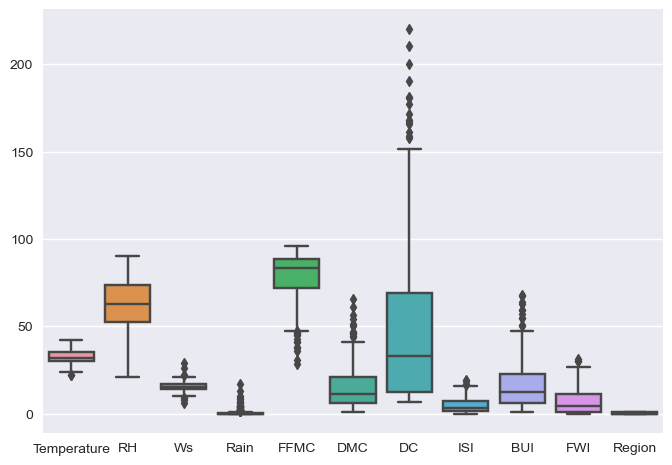

In [408]:
sns.boxplot(df)

<Axes: xlabel='month', ylabel='count'>

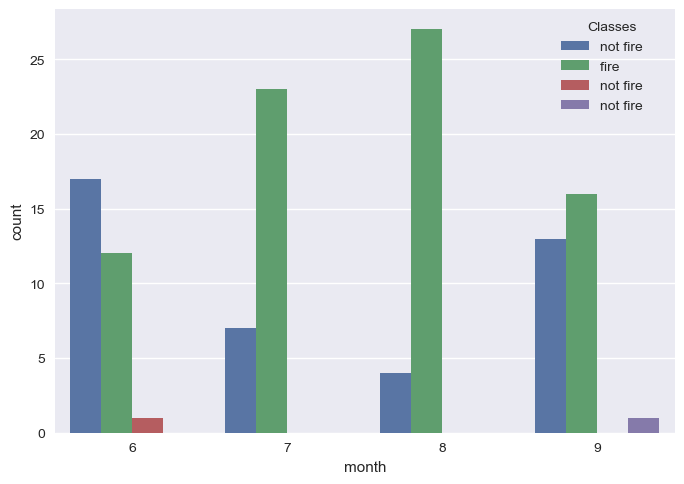

In [409]:
df_temp = dataset.loc[df["Region"] == 1]
sns.countplot(x="month", hue = "Classes",data = df_temp)


# Model Training


In [410]:
df["Classes"] = np.where(df["Classes"].astype(str).str.contains("not fire"), '0', '1')
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [411]:
X = df.drop("FWI" , axis = 1)
y = df["FWI"]

In [412]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=42)

/var/folders/6v/mq6xsp953417r5mgvbltf_jh0000gn/T/ipykernel_75447/3468783830.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True)


<Axes: >

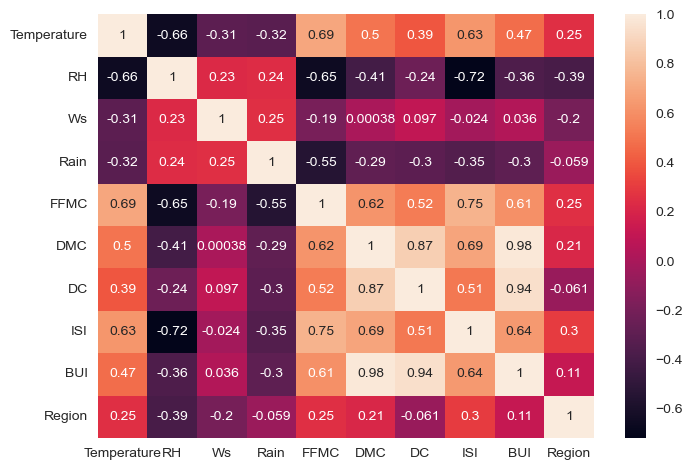

In [413]:
X_train.shape,X_test.shape
sns.heatmap(X_train.corr(), annot=True)

In [414]:
X_train.corr()

/var/folders/6v/mq6xsp953417r5mgvbltf_jh0000gn/T/ipykernel_75447/131534602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000


## Check for Multi Colinnearity

### Droppping columns which are correlated more than 0.85


In [415]:
X_train = X_train.drop(["BUI","DC"], axis = 1)
X_test = X_test.drop(["BUI","DC"], axis = 1)

## Feature Scaling

In [416]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [417]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Linear Regression

0.546823646524999 0.9847657384266951


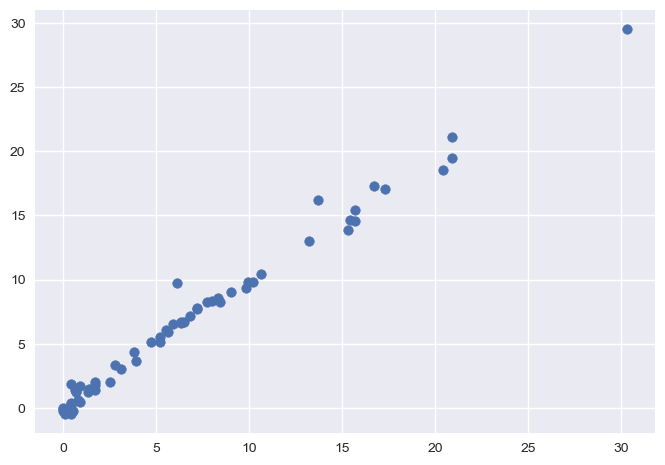

In [418]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

linreg = LinearRegression()
linreg.fit(X_train_Scaled,y_train)
y_pred = linreg.predict(X_test_Scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(mae,score)

plt.scatter(y_test,y_pred)

## Lasso Regression

1.1331759949144082 0.9492020263112388


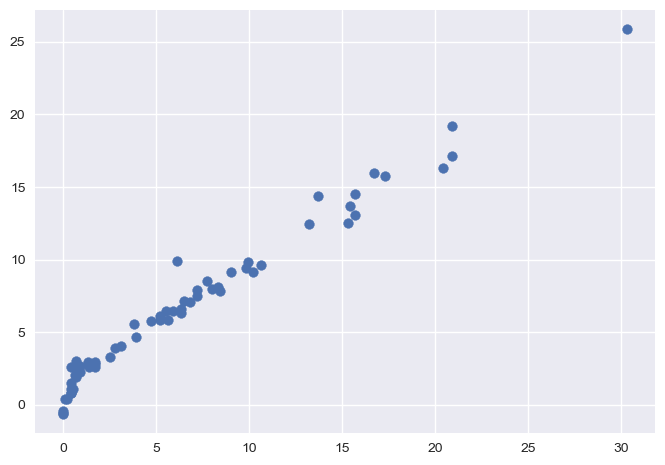

In [419]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lasso = Lasso()
lasso.fit(X_train_Scaled,y_train)
y_pred = lasso.predict(X_test_Scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(mae,score)

plt.scatter(y_test,y_pred)


## Lasso CV

0.6199701158263431 0.9820946715928275


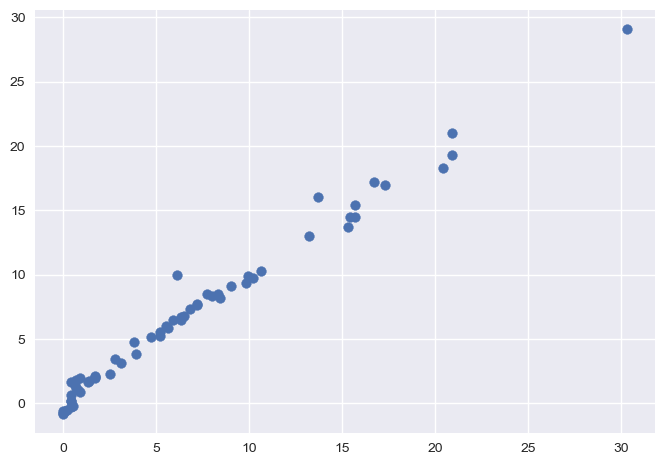

In [420]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score

lassoCV = LassoCV()
lassoCV.fit(X_train_Scaled,y_train)
y_pred = lassoCV.predict(X_test_Scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(mae,score)

plt.scatter(y_test,y_pred)


## RidgeCV

0.5642305340099462 0.9842993364555525


{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

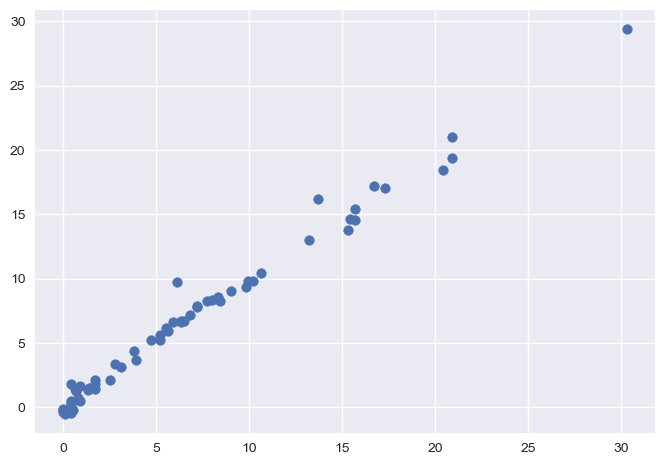

In [421]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score

ridgeCV = RidgeCV()
ridgeCV.fit(X_train_Scaled,y_train)
y_pred = ridgeCV.predict(X_test_Scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print(mae,score)

plt.scatter(y_test,y_pred)

ridgeCV.get_params()

## Pickling Standardization and RidgeCV Model

In [422]:
import  pickle
pickle.dump(scaler, open("/Users/mdshalique/Downloads/practicePythonOP/Algerian_Forest_Fire_Prediction/model/ridge.pkl","wb"))
pickle.dump(ridgeCV, open("/Users/mdshalique/Downloads/practicePythonOP/Algerian_Forest_Fire_Prediction/model/scaler.pkl","wb"))

In [423]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
